In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('Train_Val_data.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### removing missing values

In [3]:
raw_data.isnull().sum()

Brand             0
Price           105
Body              0
Mileage           0
EngineV          87
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [4]:
data_cleaned = raw_data.dropna()
data_cleaned.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [5]:
data_cleaned.nunique()

Brand             7
Price           681
Body              6
Mileage         374
EngineV          65
Engine Type       4
Registration      2
Year             37
Model           259
dtype: int64

In [6]:
data_cleaned.describe()

,Price,Mileage,EngineV,Year
count,2339.000000,2339.000000,2339.000000,2339.000000
mean,18651.710693,165.613938,2.820522,2006.262933
std,24805.691464,100.765043,5.532484,6.660511
min,600.000000,0.000000,0.600000,1969.000000
25%,6900.000000,95.000000,1.800000,2002.000000
50%,11000.000000,160.000000,2.200000,2007.000000
75%,20800.000000,231.000000,3.000000,2011.000000
max,300000.000000,630.000000,99.990000,2016.000000


### handling outliers

In [7]:
data_cleaned = data_cleaned[data_cleaned['EngineV']<10]
data_cleaned.shape

(2324, 9)

In [8]:
data_cleaned = data_cleaned[data_cleaned['Price']<(3*np.std(data_cleaned['Price']))]
data_cleaned.shape

(2247, 9)

In [9]:
data_cleaned = data_cleaned[data_cleaned['Mileage']<(3*np.std(data_cleaned['Mileage']))]
data_cleaned.describe()

,Price,Mileage,EngineV,Year
count,2006.000000,2006.000000,2006.000000,2006.000000
mean,16244.941281,148.718345,2.387652,2007.023430
std,13287.250500,77.049402,0.949636,5.890941
min,600.000000,0.000000,0.600000,1969.000000
25%,7699.250000,95.000000,1.800000,2004.000000
50%,11800.000000,151.000000,2.000000,2008.000000
75%,20844.362500,203.000000,3.000000,2011.000000
max,74500.000000,294.000000,7.200000,2016.000000


In [10]:
data_cleaned.corr()

,Price,Mileage,EngineV,Year
Price,1.000000,-0.508636,0.409628,0.552103
Mileage,-0.508636,1.000000,0.073820,-0.559841
EngineV,0.409628,0.073820,1.000000,-0.053765
Year,0.552103,-0.559841,-0.053765,1.000000


### Data visualization

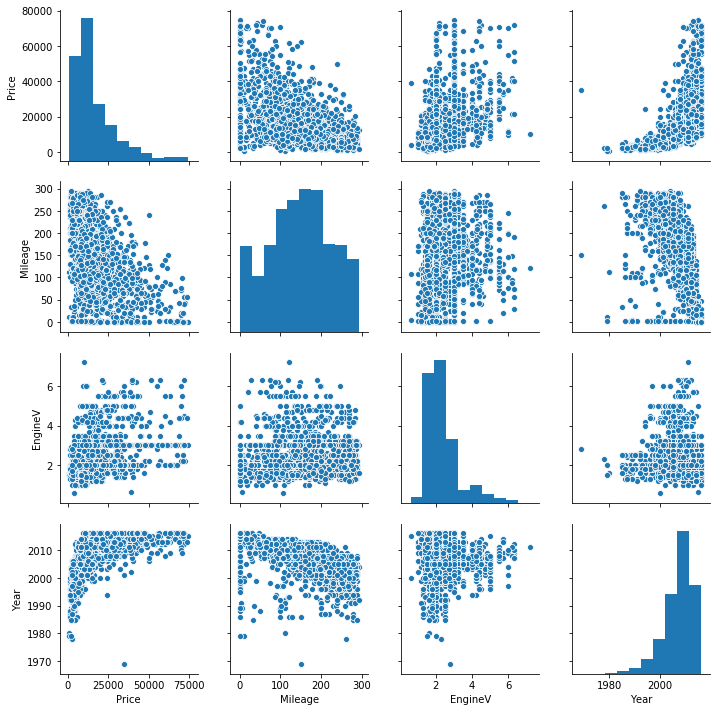

In [11]:
sns.pairplot(data_cleaned)

Text(0.5, 1.0, 'Price')

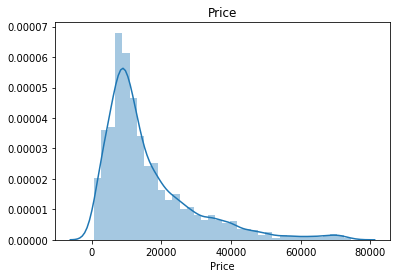

In [12]:
sns.distplot(data_cleaned['Price'])
plt.title('Price')

Text(0.5, 1.0, 'Mileage')

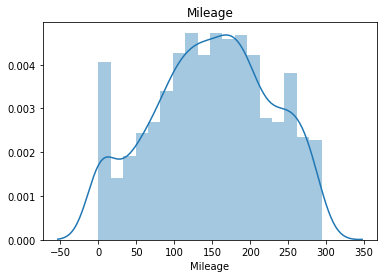

In [13]:
sns.distplot(data_cleaned['Mileage'])
plt.title('Mileage')

Text(0.5, 1.0, 'EngineV')

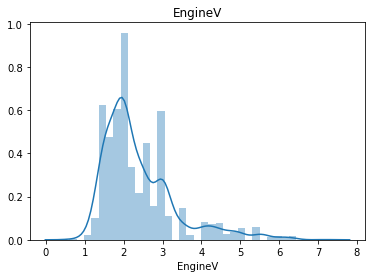

In [14]:
sns.distplot(data_cleaned['EngineV'])
plt.title('EngineV')

Text(0.5, 1.0, 'Year')

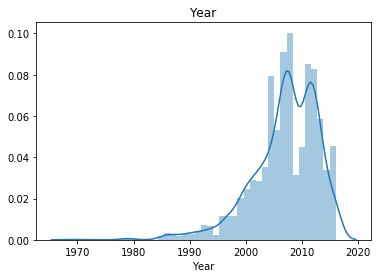

In [15]:
sns.distplot(data_cleaned['Year'])
plt.title('Year')

### Variable Transformation

In [16]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['Log Price'] = log_price
#data_cleaned = data_cleaned.drop(['Price'], axis = 1)
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Log Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6,9.560997
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane,9.287209


In [17]:
log_Engv = np.log(data_cleaned['EngineV'])
data_cleaned['Log EngineV'] = log_Engv
#data_trans = data_cleaned.drop(['EngineV'], axis = 1)
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Log Price,Log EngineV
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840,0.693147
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249,1.435085
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656,0.693147
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6,9.560997,0.993252
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane,9.287209,0.405465


Text(0.5, 1.0, 'Log Price')

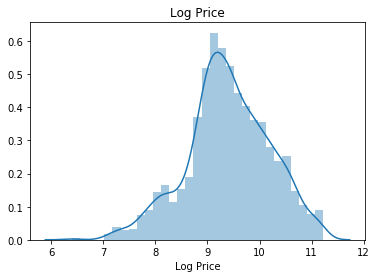

In [18]:
sns.distplot(data_cleaned['Log Price'])
plt.title('Log Price')

Text(0.5, 1.0, 'Log EngineV')

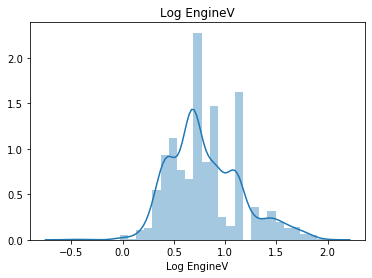

In [19]:
sns.distplot(data_cleaned['Log EngineV'])
plt.title('Log EngineV')

In [20]:
data_cleaned.corr()

,Price,Mileage,EngineV,Year,Log Price,Log EngineV
Price,1.000000,-0.508636,0.409628,0.552103,0.887813,0.413365
Mileage,-0.508636,1.000000,0.073820,-0.559841,-0.498018,0.110283
EngineV,0.409628,0.073820,1.000000,-0.053765,0.406718,0.972549
Year,0.552103,-0.559841,-0.053765,1.000000,0.705757,-0.072505
Log Price,0.887813,-0.498018,0.406718,0.705757,1.000000,0.416115
Log EngineV,0.413365,0.110283,0.972549,-0.072505,0.416115,1.000000


In [21]:
raw_data.corr()

,Price,Mileage,EngineV,Year
Price,1.000000,-0.471726,0.045495,0.484221
Mileage,-0.471726,1.000000,0.025036,-0.680700
EngineV,0.045495,0.025036,1.000000,-0.039275
Year,0.484221,-0.680700,-0.039275,1.000000


### The correlation increased had slight increase

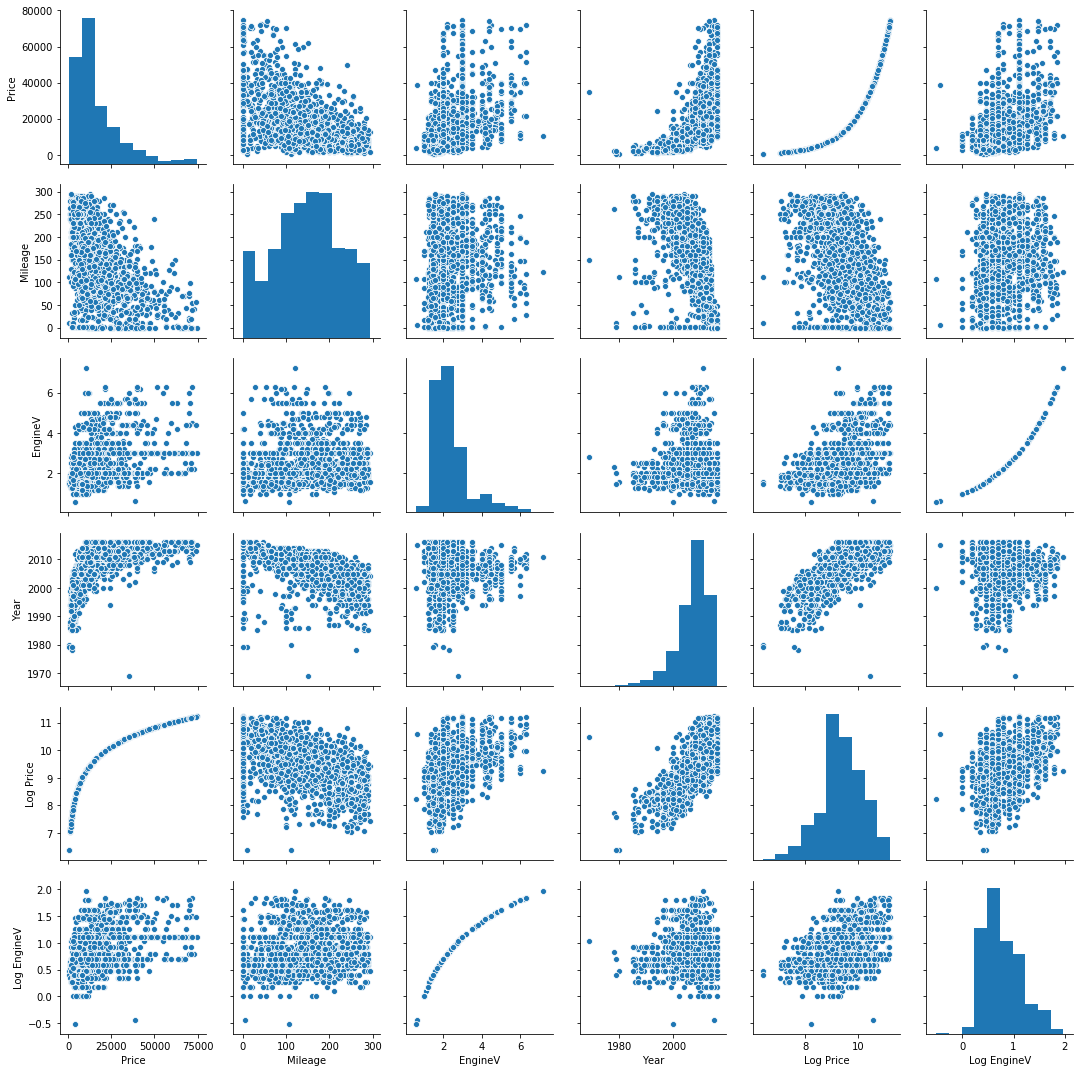

In [22]:
sns.pairplot(data_cleaned)

In [23]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)
data_cleaned = data_cleaned.drop(['EngineV'], axis = 1)
data_cleaned.head()

,Brand,Body,Mileage,Engine Type,Registration,Year,Model,Log Price,Log EngineV
0,BMW,sedan,277,Petrol,yes,1991,320,8.342840,0.693147
3,Audi,crossover,240,Petrol,yes,2007,Q7,10.043249,1.435085
4,Toyota,crossover,120,Petrol,yes,2011,Rav 4,9.814656,0.693147
7,Audi,vagon,200,Diesel,yes,2006,A6,9.560997,0.993252
8,Renault,vagon,193,Diesel,yes,2012,Megane,9.287209,0.405465


#### with just Year and Log Enginev

In [24]:
from sklearn.model_selection import train_test_split

target = data_cleaned['Log Price']
input = data_cleaned[['Year', 'Log EngineV']]

x_train, x_test, y_train, y_test = train_test_split(input, target, test_size = 0.2, random_state = 10)

In [25]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
reg.predict(x_train)

array([10.51296585,  9.44715198,  8.71597189, ..., 10.08187469,
       10.41266576, 10.41266576])

In [27]:
reg.score(x_train, y_train)

0.7190292770502402

## Multiple Linear Regression

In [28]:
target = data_cleaned['Log Price']
input = data_cleaned[['Year', 'Mileage', 'Log EngineV']]

x_train, x_test, y_train, y_test = train_test_split(input, target, test_size = 0.2, random_state = 10)

In [29]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
reg.predict(x_train)
reg.score(x_train, y_train)

0.7467549740058674

In [31]:
## label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_enc = data_cleaned.copy()
data_enc['Model'] = encoder.fit_transform(data_enc['Model'])
data_enc['Brand'] = encoder.fit_transform(data_enc['Brand'])
data_enc['Body'] = encoder.fit_transform(data_enc['Body'])
data_enc['Engine Type'] = encoder.fit_transform(data_enc['Engine Type'])
data_enc['Registration'] = encoder.fit_transform(data_enc['Registration'])
data_enc.head()

,Brand,Body,Mileage,Engine Type,Registration,Year,Model,Log Price,Log EngineV
0,1,3,277,3,1,1991,12,8.342840,0.693147
3,0,0,240,3,1,2007,175,10.043249,1.435085
4,5,0,120,3,1,2011,178,9.814656,0.693147
7,0,4,200,0,1,2006,48,9.560997,0.993252
8,4,4,193,0,1,2012,151,9.287209,0.405465


In [32]:
target = data_enc['Log Price']
input = data_enc.drop(['Log Price'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(input, target, test_size = 0.2, random_state = 10)

In [33]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
reg.predict(x_train)
reg.score(x_train, y_train)

0.8334540918264808

In [35]:
## Dummy variables

data_dum = data_cleaned.copy()
data_dum = data_dum.drop(['Model'], axis=1)
data_dum = pd.get_dummies(data_dum, drop_first=True)
data_dum.head()

,Mileage,Year,Log Price,Log EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,1991,8.342840,0.693147,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3,240,2007,10.043249,1.435085,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2011,9.814656,0.693147,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
7,200,2006,9.560997,0.993252,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
8,193,2012,9.287209,0.405465,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [36]:
data_dum.columns.values

array(['Mileage', 'Year', 'Log Price', 'Log EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

#### Standardization

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_dum)

In [38]:
target = data_dum['Log Price']
input = data_dum.drop(['Log Price'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(input, target, test_size = 0.2, random_state = 10)

In [39]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
y_pred = reg.predict(x_test)
reg.score(x_test, y_test)

0.8719909394799965

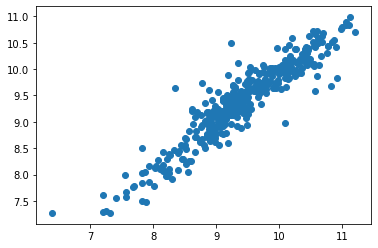

In [41]:
plt.scatter(y_test, y_pred)

In [42]:
residuals = y_test - y_pred
results = pd.DataFrame(y_test, columns=['Target'])
results['Target'] = y_test
results['Prediction'] = y_pred
results['Residuals'] = residuals
results['Difference %'] = (residuals/y_test)*100
results = results.sort_values(['Difference %'], ascending = False)
results

,Target,Prediction,Residuals,Difference %
631,10.085809,8.980820,1.104989,10.955881
64,10.819778,9.680770,1.139008,10.527092
289,10.925129,9.836020,1.089109,9.968840
188,10.568441,9.593433,0.975008,9.225652
1616,10.596635,9.864095,0.732540,6.912949
...,...,...,...,...
393,7.824046,8.498196,-0.674150,-8.616387
756,8.779557,9.736081,-0.956523,-10.894894
141,6.396930,7.269601,-0.872671,-13.642030
1649,9.230143,10.504257,-1.274114,-13.803841


In [43]:
np.sqrt(np.mean(residuals**2))

0.28189963459644685

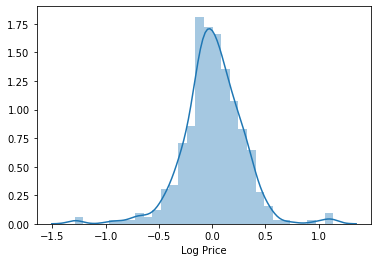

In [44]:
sns.distplot(residuals)

## Polynomial regression

In [45]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)  # with degree 2
x_poly = poly.fit_transform(input)
poly.fit(x_poly, target)

x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_poly, target, test_size = 0.2, random_state = 10)

lin2 = LinearRegression()
lin2.fit(x_train_p, y_train_p)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_pred_p_t = lin2.predict(x_test_p)

In [47]:
lin2.score(x_test_p, y_test_p)

0.8949607154759738

In [48]:
residuals_p = y_test_p - y_pred_p_t
results = pd.DataFrame(y_test_p, columns=['Target'])
results['Target'] = y_test_p
results['Prediction'] = y_pred_p_t
results['Residuals'] = residuals_p
results['Difference %'] = (residuals_p/y_test_p)*100
results = results.sort_values(['Difference %'], ascending = False)
results

,Target,Prediction,Residuals,Difference %
64,10.819778,9.601585,1.218194,11.258952
289,10.925129,9.743979,1.181150,10.811314
1616,10.596635,9.770525,0.826110,7.795964
188,10.568441,9.808076,0.760365,7.194678
631,10.085809,9.377157,0.708652,7.026226
...,...,...,...,...
393,7.824046,8.583562,-0.759516,-9.707458
756,8.779557,9.794045,-1.014487,-11.555109
1649,9.230143,10.413217,-1.183074,-12.817502
1434,8.342840,9.413941,-1.071101,-12.838569


In [49]:
np.sqrt(np.mean(residuals_p**2))

0.25535833340657144

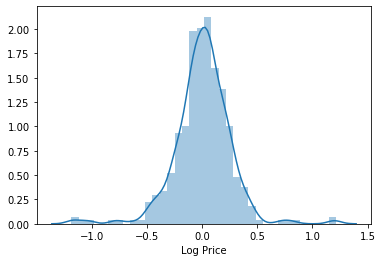

In [50]:
sns.distplot(residuals_p)

## Ridge regression

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()

parameters = {'alpha' : [1e-15, 1e-10, 1e-5, 1e-3, 1e-2, 1, 3, 5, 10, 20, 30]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=5)
ridge_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.01, 1, 3, 5,
                                   10, 20, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [52]:
y_pred = ridge_regressor.predict(x_test)

In [53]:
ridge_regressor.best_params_

{'alpha': 1}

In [54]:
ridge_regressor.best_score_

-0.08057920547697715

## Lasso Regression

In [76]:
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha' : [1e-15, 1e-10, 1e-5, 1e-3, 1e-2, 1, 3, 5, 10, 20, 30]}

lasso_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.01, 1, 3, 5,
                                   10, 20, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [77]:
y_pred = lasso_regressor.predict(x_test)

In [78]:
lasso_regressor.best_score_

-0.08057920547697715

## We are getting 90% accuracy with Polynomial regression

## Elastic net Regression

In [58]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet()
enet.fit(x_train, y_train)
y_pred = enet.predict(x_test)
enet.score(x_test, y_test)

0.5215132726674787

## Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50)

rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [60]:
y_pred = rf.predict(x_test)

In [61]:
rf.score(x_test, y_test)

0.8949266049961744

In [62]:
rf.score(x_train, y_train)

0.9839090597610987

In [63]:
rf.feature_importances_

array([0.09773677, 0.52195627, 0.23888635, 0.00581913, 0.007325  ,
       0.00827288, 0.01703606, 0.00433892, 0.00402117, 0.00126135,
       0.0042977 , 0.00672258, 0.00348056, 0.00877135, 0.00279048,
       0.00093942, 0.0037568 , 0.06258722])

#### Random Forest has 89.4% test accuracy

### SVM

In [64]:
## trying LinearSVR

from sklearn.svm import LinearSVR

svr = LinearSVR()
svr.fit(x_train, y_train)

C:\Users\risha\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [65]:
y_pred = svr.predict(x_test)

In [66]:
svr.score(x_test, y_test)

0.22228523597254868

In [67]:
## trying NUSVR

from sklearn.svm import NuSVR

svr = NuSVR()
svr.fit(x_train, y_train)

C:\Users\risha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


NuSVR(C=1.0, cache_size=200, coef0=0.0, degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
      verbose=False)

In [68]:
svr.score(x_test, y_test)

0.6942151537137672

In [69]:
## trying Epsilon SVM

from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train)

C:\Users\risha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [70]:
svr.score(x_test, y_test)

0.7043703799730541

## Decision Tree

In [71]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt = dt.fit(x_train, y_train)
dt

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [72]:
dt.score(x_test, y_test)

0.7958612040674086

In [73]:
## Using Extra Tree Regressor, randomized decision tree

from sklearn.tree import ExtraTreeRegressor

edt = ExtraTreeRegressor()
edt.fit(x_train, y_train)

ExtraTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                   max_leaf_nodes=None, min_impurity_decrease=0.0,
                   min_impurity_split=None, min_samples_leaf=1,
                   min_samples_split=2, min_weight_fraction_leaf=0.0,
                   random_state=None, splitter='random')

In [74]:
edt.score(x_test, y_test)

0.832717039773023

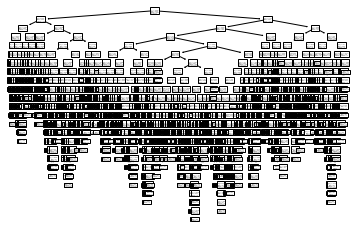

In [75]:
## Plotting decison tree

from sklearn.tree import plot_tree

pt = plot_tree(dt)